# Higgs Boson Machine Learning Challenge

[Challenge Site](https://www.kaggle.com/c/higgs-boson)

Discovery of the long awaited Higgs boson was announced July 4, 2012 and confirmed six months later. 2013 saw a number of prestigious awards, including a Nobel prize. But for physicists, the discovery of a new particle means the beginning of a long and difficult quest to measure its characteristics and determine if it fits the current model of nature.

A key property of any particle is how often it decays into other particles. ATLAS is a particle physics experiment taking place at the Large Hadron Collider at CERN that searches for new particles and processes using head-on collisions of protons of extraordinarily high energy. The ATLAS experiment has recently observed a signal of the Higgs boson decaying into two tau particles, but this decay is a small signal buried in background noise. 

The goal of the Higgs Boson Machine Learning Challenge is to explore the potential of advanced machine learning methods to improve the discovery significance of the experiment. No knowledge of particle physics is required. Using simulated data with features characterizing events detected by ATLAS, your task is to classify events into "tau tau decay of a Higgs boson" versus "background." 

## File descriptions

- training.csv - Training set of 250000 events, with an ID column, 30 feature columns, a weight column and a label column.
- test.csv - Test set of 550000 events with an ID column and 30 feature columns.

For detailed information on the semantics of the features, labels, and weights, see the technical documentation from the LAL website on the task.

Some details to get started:

- all variables are floating point, except `PRI_jet_num` which is integer
- variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
- variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by  the physicists of ATLAS
- it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

**From the documentation:**

**EventId**: An unique integer identifier of the event. Not to be used as a feature.

**DER_mass_MMC**: The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration (may be undefined if the topology of the event is too far from the expected topology).

**DER_mass_transverse_met_lep**: The transverse mass between the missing transverse energy and the lepton.

**DER_mass_vis**: The invariant mass of the hadronic tau and the lepton.

**DER_pt_h**: The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton, and the missing transverse energy vector.

**DER_deltaeta_jet_jet**: The absolute value of the pseudorapidity separation between the two jets (undefined if `PRI_jet_num` ≤ 1).

**DER_mass_jet_jet** The invariant mass of the two jets (undefined if `PRI_jet_num` ≤ 1).

**DER prodeta jet jet** The product of the pseudorapidities of the two jets (undefined if `PRI_jet_num` ≤ 1).

**DER_deltar_tau_lep**: The R separation between the hadronic tau and the lepton.

**DER_pt_tot**: The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if `PRI_jet_num` ≥ 1) and the subleading jet (if `PRI_jet_num` = 2) (but not of any additional jets).

**DER_sum_pt**: The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if `PRI_jet_num` ≥ 1) and the subleading jet (if `PRI_jet_num` = 2) and the other jets (if `PRI_jet_num` = 3).

**DER_pt_ratio_lep_tau**: The ratio of the transverse momenta of the lepton and the hadronic tau

**DER_met_phi_centrality**: The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.

**DER_lep_eta_centrality**: The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if `PRI_jet_num` ≤ 1). The centrality is 1 when the lepton is on the bisector of the two jets, decreases to 1/e when it is collinear to one of the jets, and decreases further to zero at infinity.

**PRI_tau_pt**: The transverse momentum of the hadronic tau.

**PRI_tau_eta**: The pseudorapidity η of the hadronic tau.

**PRI_tau_phi**: The azimuth angle φ of the hadronic tau.

**PRI_lep_pt**: The transverse momentum of the lepton (electron or muon).

**PRI_lep_eta**: The pseudorapidity η of the lepton.

**PRI_lep_phi**: The azimuth angle φ of the lepton.

**PRI_met**: The missing transverse energy.

**PRI_met_phi**: The azimuth angle φ of the missing transverse energy.

**PRI_met_sumet**: The total transverse energy in the detector.

**PRI_jet_num**: The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3).

**PRI_jet_leading_pt**: The transverse momentum of the leading jet, that is the jet with largest transverse momentum (undefined if `PRI_jet_num` = 0).

**PRI_jet_leading_eta**: The pseudorapidity η of the leading jet (undefined if `PRI_jet_num` = 0).

**PRI_jet_leading_phi**: The azimuth angle φ of the leading jet (undefined if `PRI_jet_num` = 0).

**PRI_jet_subleading_pt**: The transverse momentum of the leading jet, that is, the jet with second largest transverse momentum (undefined if `PRI_jet_num` ≤ 1).

**PRI_jet_subleading_eta**: The pseudorapidity η of the subleading jet (undefined if `PRI_jet_num` ≤ 1).

**PRI_jet_subleading phi**: The azimuth angle φ of the subleading jet (undefined if `PRI_jet_num` ≤ 1).

**PRI_jet_all_pt**: The scalar sum of the transverse momentum of all the jets of the events.

**Weight**: The event weight. Not to be used as a feature. Not available in the test sample.

**Label**: The event label (string) yi ∈ {s, b} (s for signal, b for background). Not to be used as a feature. Not available in the test sample.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Training and testing datasets

In [2]:
train_df = pd.read_csv('training.csv')
x_test = pd.read_csv('test.csv')

print(train_df.shape, x_test.shape)

(250000, 33) (550000, 31)


In [3]:
train_df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
train_df = train_df.drop('EventId', 1)
train_df = train_df.drop('Weight', 1)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [6]:
x_test = x_test.drop('EventId', 1)
x_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [7]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 550000 non-null  float64
 1   DER_mass_transverse_met_lep  550000 non-null  float64
 2   DER_mass_vis                 550000 non-null  float64
 3   DER_pt_h                     550000 non-null  float64
 4   DER_deltaeta_jet_jet         550000 non-null  float64
 5   DER_mass_jet_jet             550000 non-null  float64
 6   DER_prodeta_jet_jet          550000 non-null  float64
 7   DER_deltar_tau_lep           550000 non-null  float64
 8   DER_pt_tot                   550000 non-null  float64
 9   DER_sum_pt                   550000 non-null  float64
 10  DER_pt_ratio_lep_tau         550000 non-null  float64
 11  DER_met_phi_centrality       550000 non-null  float64
 12  DER_lep_eta_centrality       550000 non-null  float64
 13 

## Exploration

### Signal VS Background

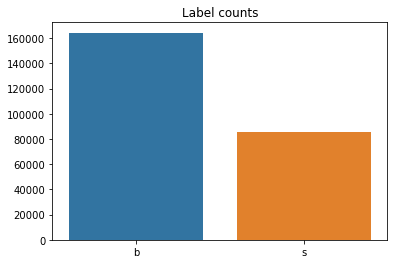

In [8]:
sns.barplot(x = train_df['Label'].value_counts().index, y = train_df['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

### Distribution of the scalar sum of the transverse momentum of all the jets of the events

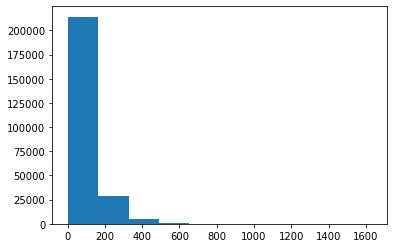

In [9]:
plt.hist(train_df.PRI_jet_all_pt);

### Distribution of the total transverse energy in the detector

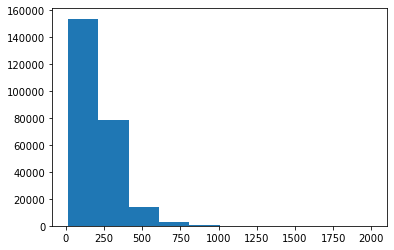

In [10]:
plt.hist(train_df.PRI_met_sumet);

### Distribution of the estimated mass mH of the Higgs boson candidate

*Obtained through a probabilistic phase space integration (may be undefined if the topology of the event is too far from the expected topology).*

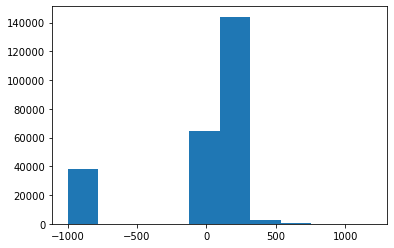

In [11]:
plt.hist(train_df.DER_mass_MMC);

### Correlations

First, encoding the labels to be able to create the matrix plot.

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train_df['Label'] = enc.fit_transform(train_df['Label'])
train_df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [13]:
correlation = train_df.corr().unstack().sort_values(ascending = False)
high_corr = correlation[(correlation >= .8) & (correlation < 1)]
high_corr

DER_lep_eta_centrality  DER_deltaeta_jet_jet      0.999998
DER_deltaeta_jet_jet    DER_lep_eta_centrality    0.999998
DER_lep_eta_centrality  PRI_jet_subleading_phi    0.999998
PRI_jet_subleading_phi  DER_lep_eta_centrality    0.999998
PRI_jet_subleading_eta  DER_lep_eta_centrality    0.999997
                                                    ...   
DER_mass_jet_jet        PRI_jet_num               0.814191
DER_pt_h                PRI_jet_all_pt            0.808616
PRI_jet_all_pt          DER_pt_h                  0.808616
                        PRI_jet_num               0.804326
PRI_jet_num             PRI_jet_all_pt            0.804326
Length: 80, dtype: float64

In [14]:
mid_corr = correlation[(correlation >= .5) & (correlation < .8)]
mid_corr

DER_pt_h               PRI_met_sumet            0.782547
PRI_met_sumet          DER_pt_h                 0.782547
PRI_jet_num            DER_sum_pt               0.758503
DER_sum_pt             PRI_jet_num              0.758503
PRI_jet_all_pt         PRI_jet_subleading_pt    0.729042
                                                  ...   
PRI_jet_leading_phi    PRI_jet_subleading_pt    0.521329
PRI_jet_leading_eta    PRI_jet_subleading_pt    0.521322
PRI_jet_subleading_pt  PRI_jet_leading_eta      0.521322
PRI_met                DER_sum_pt               0.520129
DER_sum_pt             PRI_met                  0.520129
Length: 146, dtype: float64

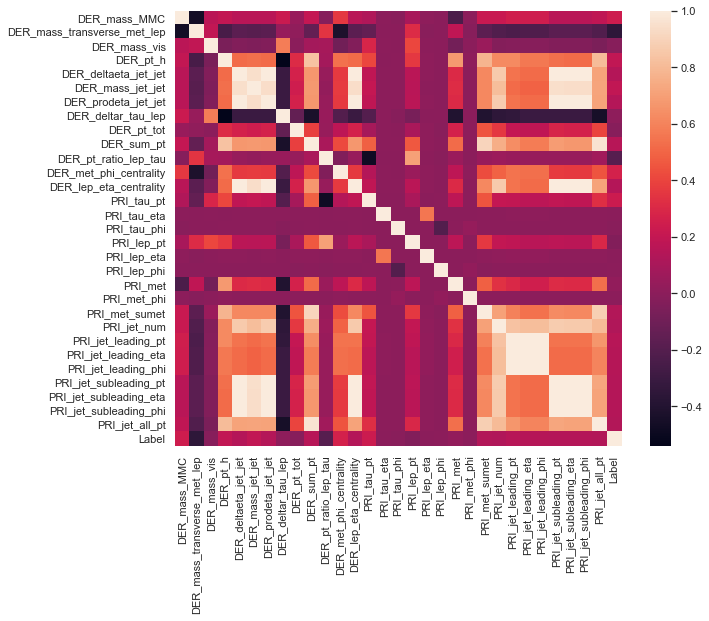

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(train_df.corr());

## Data Pre-processing

In [16]:
y = train_df.Label
x = train_df.drop('Label', axis = 1)
x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [17]:
y

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int32

### Imputation

Missing values are labeled as -999.00, one way to handle them is to impute using the mean of the respective columns.

In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-999.00, strategy='mean')
cols1 = x.columns
x = pd.DataFrame(imp.fit_transform(x), columns=cols1)
cols2 = x_test.columns
x_test = pd.DataFrame(imp.fit_transform(x_test), columns=cols2)
x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497
1,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226000,0.725000,1.158000,57.679474,-0.011845,-0.001582,46.226
2,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251000,2.053000,-2.028000,57.679474,-0.011845,-0.001582,44.251
3,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,3.310,0.414,75.968,...,0.060,86.062,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,-0.000
4,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,3.891,16.405,57.983,...,-0.871,53.131,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000


### Scaling

In [19]:
from sklearn.preprocessing import RobustScaler

cols = x.columns
index = x.index

scaler = RobustScaler().fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x, columns = cols, index = index)

x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.529804,0.094394,0.732425,-0.161098,-1.493735,-247.07236,3.487688,0.497394,1.196465,0.627159,...,-0.080676,0.562789,0.5,-0.634957,2.486460,0.430966,-11.617474,1.251845,-2.473418,0.663895
1,1.172797,0.409221,0.896951,0.148671,0.000000,0.00000,0.000000,0.852737,-0.413636,0.036546,...,-0.603316,-0.108242,0.0,-1.409486,0.840964,1.105187,0.000000,0.000000,0.000000,0.051972
2,0.054392,2.127564,1.588093,-0.043510,0.000000,0.00000,0.000000,0.570374,-0.120384,0.627598,...,-0.689413,0.574765,0.0,-1.481611,2.374451,-1.903312,0.000000,0.000000,0.000000,0.034007
3,0.685350,0.641923,0.218769,-0.584537,0.000000,0.00000,0.000000,0.711121,-0.480869,-0.363598,...,0.026786,-0.667397,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368517
4,1.600000,-0.544714,1.857394,-0.338900,0.000000,0.00000,0.000000,1.215899,0.165232,-0.509903,...,-0.270089,-0.902012,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368517


### Train and Validation Sets

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=0)

y_train = np.asarray(y_train, dtype = np.int)
y_val = np.asarray(y_val, dtype = np.int)

y_train = np.reshape(y_train, [y_train.shape[0],1])
y_val = np.reshape(y_val, [y_val.shape[0],1])

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(187500, 30) (62500, 30) (187500, 1) (62500, 1)


In [21]:
x_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
202866,1.282639,0.610207,0.305291,0.359177,0.000000,0.00000,0.000000,0.102954,0.308990,0.130348,...,0.977997,0.225738,0.0,-1.390058,-2.761808,0.211891,0.000000,0.000000,0.000000,0.056811
221867,0.054392,0.242637,-0.151231,-0.550912,0.000000,0.00000,0.000000,-0.235882,-0.392424,-0.384765,...,-0.278699,-0.602066,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368517
159299,-1.635231,0.337233,-0.712924,0.296074,0.000000,0.00000,0.000000,-1.121199,0.045111,0.117024,...,-0.847258,0.163171,0.0,-1.467588,0.941426,-1.932585,0.000000,0.000000,0.000000,0.037500
77206,0.393775,-0.649576,-0.347214,0.926102,-2.034735,-289.56636,1.327688,0.005647,0.470444,0.951478,...,-0.993941,1.154916,1.0,0.832480,0.640040,-0.163935,-22.742474,0.930845,1.169582,1.234703
86909,0.054392,0.467024,-1.682159,-0.547701,0.000000,0.00000,0.000000,-1.490443,-0.383980,-0.582295,...,0.696429,-0.508771,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368517


In [22]:
x_val.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
140089,0.236569,0.545376,0.533796,0.449054,0.000000,0.00000,0.000000,0.528671,2.237798,-0.258269,...,-0.615115,-0.164005,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368517
93747,0.054392,0.613628,-1.300325,-0.553477,0.000000,0.00000,0.000000,-1.226325,-0.399172,-0.528906,...,-0.302296,-0.919047,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368517
180647,-0.457024,0.263848,0.155794,-0.066321,0.000000,0.00000,0.000000,0.261946,0.327455,0.142868,...,-0.605867,-0.241540,0.0,-1.104773,-0.788367,0.228888,0.000000,0.000000,0.000000,0.127872
64526,1.283440,-0.657431,0.048372,0.310222,3.137265,469.11864,-5.517312,0.546916,-0.454606,0.468830,...,0.529337,0.114825,0.5,-0.347517,-4.530861,-0.729563,-21.075474,1.625845,-3.063418,0.649450
19100,-0.922262,-0.508435,-0.533248,0.641987,0.000000,0.00000,0.000000,-0.609470,-0.477394,0.193157,...,0.983418,-0.389636,0.0,-0.171277,1.297084,0.007925,0.000000,0.000000,0.000000,0.360394


In [23]:
x_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,121.875333,79.589,23.916,3.036,2.405857,372.476272,-0.831557,0.903,3.036,56.018,...,2.022,98.556,0.0,84.934599,-0.000811,-0.02148,57.841388,-0.004402,-0.012826,-0.000
1,106.398000,67.490,87.949,49.994,2.405857,372.476272,-0.831557,2.048,2.679,132.865,...,-1.138,176.251,1.0,47.575000,-0.553000,-0.84900,57.841388,-0.004402,-0.012826,47.575
2,117.794000,56.226,96.358,4.137,2.405857,372.476272,-0.831557,2.755,4.137,97.600,...,-1.868,111.505,0.0,84.934599,-0.000811,-0.02148,57.841388,-0.004402,-0.012826,0.000
3,135.861000,30.604,97.288,9.104,2.405857,372.476272,-0.831557,2.811,9.104,94.112,...,1.172,164.707,0.0,84.934599,-0.000811,-0.02148,57.841388,-0.004402,-0.012826,0.000
4,74.159000,82.772,58.731,89.646,1.347000,536.663000,-0.339000,1.028,77.213,721.552,...,-0.231,869.614,3.0,254.085000,-1.013000,-0.33400,185.857000,0.335000,2.587000,599.213


## Neural Network Model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Hyperparameters
training_epochs = 150
learning_rate = 0.01
momentum = 0.9

# Model
def create_model():
    model = tf.keras.Sequential()
    
    # Hidden Layer 1
    model.add(tf.keras.layers.Dense(30, input_dim=30, activation='relu'))
    model.add(Dropout(0.3))
    
    # Hidden Layer 2
    #model.add(tf.keras.layers.Dense(10, input_dim=40, activation='relu'))
    #model.add(Dropout(0.5))
    
    # Output Layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\brend\anaconda3\envs\LHC\lib\site-packages\tensorflow\python\framework

## Model Training

In [25]:
model = create_model()
model.summary()

results = model.fit(
    x_train, y_train,
    epochs= training_epochs,
    batch_size=150,
    validation_data = (x_val, y_val),
    verbose = 1
)

print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_train, y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on validation set...")
(loss, accuracy) = model.evaluate(x_val, y_val, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Train on 187500 samples, validate on 62500 samples
Epoch 1/150
187500/187500 [==============================] - 3s 17us/sample - loss: 1.2429 - acc: 0.7172 - val_loss: 0.4685 -

In [26]:
model.save("higgs.h5")

## Results

### Accuracy and Loss Plots

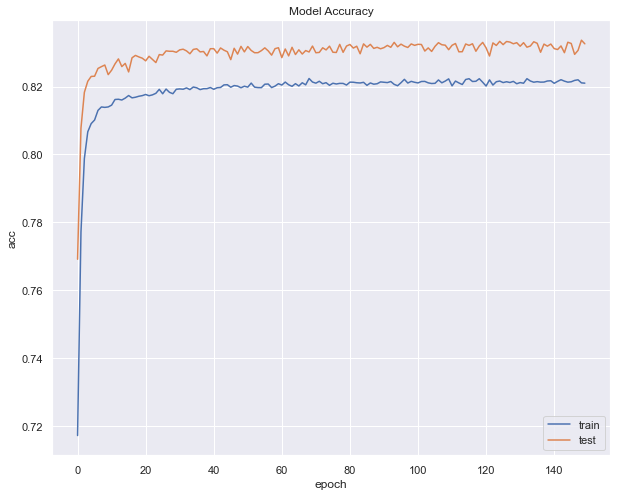

In [27]:
# Accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

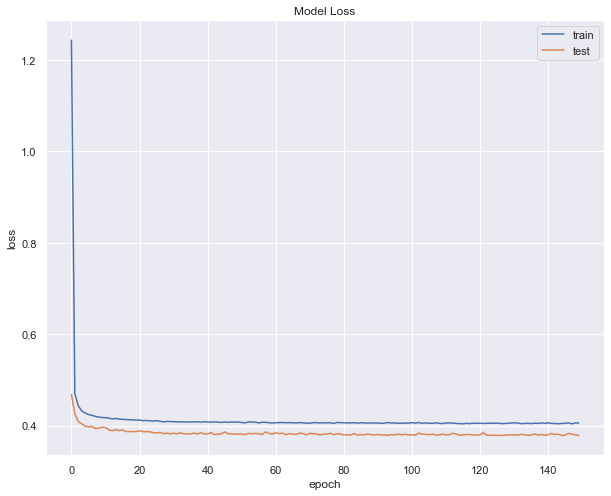

In [28]:
# Loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [29]:
max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss {:.4f}".format(max_loss))
print("")
print("Minimum Loss: {:.4f}".format(min_loss))
print("")
print("Loss Difference: {:.4f}".format((max_loss - min_loss)))

Maximum Loss 1.2429

Minimum Loss: 0.4039

Loss Difference: 0.8390


### ROC Plot

In [30]:
y_pred = model.predict(x_val)
y_pred = np.round(y_pred).astype(int)
y_pred.shape

(62500, 1)

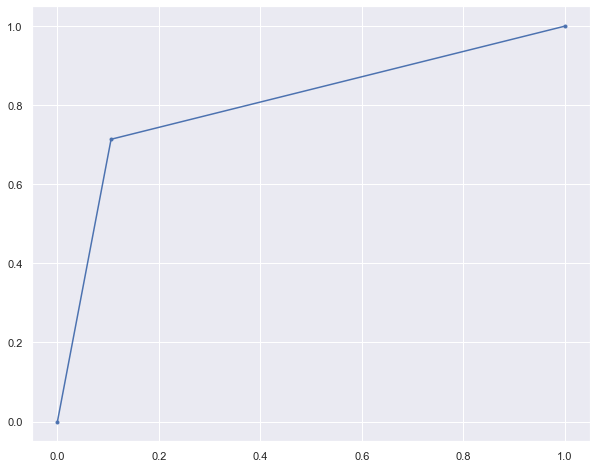

In [31]:
from sklearn.metrics import roc_curve, auc

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras);

In [32]:
auc_keras

0.8041210915058349

## Trying on Test Set

In [33]:
cols = x_test.columns
index = x_test.index

scaler = RobustScaler().fit(x_test)
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns = cols, index = index)

x_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.048239,0.609823,-1.521511,-0.544777,0.000000,0.000000,0.000000,-1.385353,-0.377010,-0.523554,...,0.651022,-0.577532,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524
1,-0.392673,0.387140,0.433636,0.177185,0.000000,0.000000,0.000000,-0.387097,-0.391399,0.098452,...,-0.357918,-0.026240,0.0,-1.373282,-0.641335,-0.790373,0.000000,0.000000,0.000000,0.063991
2,-0.068028,0.179826,0.690391,-0.527849,0.000000,0.000000,0.000000,0.229294,-0.332635,-0.186986,...,-0.590996,-0.485651,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524
3,0.446657,-0.291747,0.718787,-0.451483,0.000000,0.000000,0.000000,0.278117,-0.132441,-0.215218,...,0.379630,-0.108151,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524
4,-1.311085,0.668406,-0.458490,0.786819,-1.058857,164.186728,0.492557,-1.276373,2.612672,4.863335,...,-0.068327,4.893584,1.0,6.217714,-1.175597,-0.298491,128.015612,0.339402,2.599826,5.055874


In [34]:
test_pred = model.predict(x_test)
test_pred = np.round(test_pred).astype(int)
test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [35]:
x_test['Label'] = test_pred

In [36]:
x_test.shape

(550000, 31)

In [37]:
x_test[x_test.Label == 1]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
3,0.446657,-0.291747,0.718787,-0.451483,0.000000,0.000000,0.000000,0.278117,-0.132441,-0.215218,...,-0.108151,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524,1
9,-0.274706,-0.803112,-0.354524,2.172180,0.850143,-35.275272,-1.227443,-1.220575,0.589577,1.425373,...,1.288681,0.5,1.137028,-0.996735,1.893486,-17.414388,2.401402,1.491826,1.047811,1
19,1.112184,-0.177452,1.127324,-0.570329,0.000000,0.000000,0.000000,0.649520,-0.443997,-0.152270,...,-0.435180,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524,1
26,0.592798,-0.780456,0.603127,1.114914,0.000000,0.000000,0.000000,-0.193548,-0.281891,0.511243,...,0.319763,0.0,1.155555,-1.673855,-0.444623,0.000000,0.000000,0.000000,0.686540,1
44,-0.729140,-0.263035,-0.077127,-0.546929,0.000000,0.000000,0.000000,0.382738,-0.382653,-0.420192,...,-0.160800,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549966,-0.211634,-0.334723,0.330891,-0.497284,0.000000,0.000000,0.000000,0.790759,-0.252509,-0.521927,...,-0.451521,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524,1
549972,1.087998,-0.559485,0.418003,1.035934,-1.190857,-268.069272,1.226557,-0.312990,0.178469,0.766214,...,1.861004,0.5,-0.232262,1.722196,2.666170,-14.987388,0.271402,1.533826,0.732682,1
549973,-0.215509,-0.192820,0.441391,-0.018165,0.000000,0.000000,0.000000,-0.108980,-0.391842,0.091176,...,-0.248452,0.0,-1.832286,3.564240,-1.157135,0.000000,0.000000,0.000000,-0.049006,1
549986,-0.543287,-0.655633,-0.007450,-0.471009,0.000000,0.000000,0.000000,0.385353,-0.183628,-0.389427,...,-0.375329,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.366524,1


In [38]:
x_test[x_test.Label == 1].shape

(172116, 31)

In [39]:
x_test['Label'] = x_test['Label'].replace(1,'s')
x_test['Label'] = x_test['Label'].replace(0,'b')

In [40]:
x_test.to_csv('sub.csv')

## Comments

Winning solutions for the Kaggle challenge are based on Gradient Boosting Classifiers; this is an attempt at approaching the problem with a neural network using Keras.

It is difficult to get the right hyperparameters for he model to successfully learn, the next step would be to explore tools that iterate between different parameters to find the optimal combination.

The accuracy was better with a simple model of one hidden layer, without dropout, it was not possible to improve on the 83% accuracy with the model and methods that were used.

However, the learning behaviour is better if we include dropout of 0.3.